# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

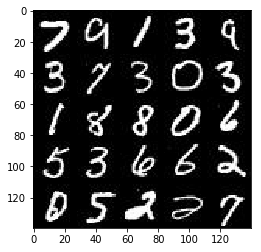

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

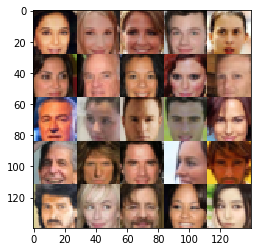

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
#     images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "images")
#     z = tf.placeholder(tf.float32, (None, z_dim), "z")
#     learning_rate = tf.placeholder(tf.float32, name="learning_rate")
#     return images, z, learning_rate

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    training = True
    x = images
    with tf.variable_scope('discriminator', reuse=reuse):

        x = tf.layers.conv2d(x, 64, 4, strides=2, padding="same")
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 256, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.reshape(x, (-1, 7*7*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*256)
        x = tf.reshape(x, (-1, 7,7,256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        
#         x = tf.layers.conv2d_transpose(x, 256, 4, strides=2, padding="same")
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(x*alpha, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #14*14
        
        x = tf.layers.conv2d_transpose(x, 64, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #28*28
        
        #x = tf.layers.conv2d_transpose(x, 3, kernel_size = [5, 5], strides=1, padding="valid")
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 4, strides=2, padding="same")
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real*0.9)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, image_width, image_height, image_channels = data_shape
    inputs_real, inputs_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = 2 * batch_images
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, show_n_images, inputs_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6955... Generator Loss: 0.8476
Epoch 1/2... Discriminator Loss: 0.4067... Generator Loss: 1.3777
Epoch 1/2... Discriminator Loss: 0.5954... Generator Loss: 3.0634
Epoch 1/2... Discriminator Loss: 2.9630... Generator Loss: 0.0699
Epoch 1/2... Discriminator Loss: 1.0004... Generator Loss: 0.6101
Epoch 1/2... Discriminator Loss: 0.2405... Generator Loss: 2.1131
Epoch 1/2... Discriminator Loss: 1.0817... Generator Loss: 0.6364
Epoch 1/2... Discriminator Loss: 0.4188... Generator Loss: 3.4162
Epoch 1/2... Discriminator Loss: 0.3097... Generator Loss: 2.0689
Epoch 1/2... Discriminator Loss: 0.4095... Generator Loss: 1.3577


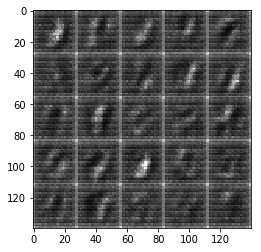

Epoch 1/2... Discriminator Loss: 0.4077... Generator Loss: 1.4003
Epoch 1/2... Discriminator Loss: 0.4390... Generator Loss: 1.8330
Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 2.9087
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 0.5071
Epoch 1/2... Discriminator Loss: 0.5568... Generator Loss: 1.2068
Epoch 1/2... Discriminator Loss: 0.4506... Generator Loss: 1.9850
Epoch 1/2... Discriminator Loss: 0.6662... Generator Loss: 0.9966
Epoch 1/2... Discriminator Loss: 0.6805... Generator Loss: 0.8749
Epoch 1/2... Discriminator Loss: 0.4559... Generator Loss: 1.4041
Epoch 1/2... Discriminator Loss: 0.3768... Generator Loss: 1.5635


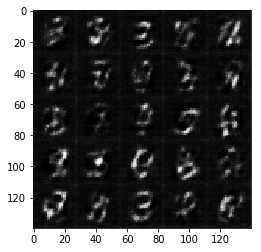

Epoch 1/2... Discriminator Loss: 0.5397... Generator Loss: 1.1325
Epoch 1/2... Discriminator Loss: 1.3366... Generator Loss: 0.3623
Epoch 1/2... Discriminator Loss: 0.3479... Generator Loss: 2.0829
Epoch 1/2... Discriminator Loss: 0.4238... Generator Loss: 1.3763
Epoch 1/2... Discriminator Loss: 0.3643... Generator Loss: 2.0520
Epoch 1/2... Discriminator Loss: 0.3144... Generator Loss: 1.8035
Epoch 1/2... Discriminator Loss: 0.7200... Generator Loss: 3.9328
Epoch 1/2... Discriminator Loss: 0.4420... Generator Loss: 1.5822
Epoch 1/2... Discriminator Loss: 0.5226... Generator Loss: 1.2136
Epoch 1/2... Discriminator Loss: 0.3584... Generator Loss: 1.7296


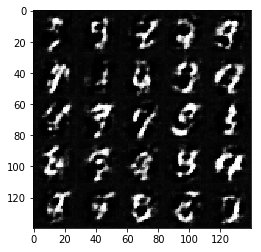

Epoch 1/2... Discriminator Loss: 0.4296... Generator Loss: 2.1635
Epoch 1/2... Discriminator Loss: 0.4650... Generator Loss: 1.5322
Epoch 1/2... Discriminator Loss: 0.4676... Generator Loss: 1.2262
Epoch 1/2... Discriminator Loss: 0.5569... Generator Loss: 1.1121
Epoch 1/2... Discriminator Loss: 0.3955... Generator Loss: 1.7672
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 0.5882
Epoch 1/2... Discriminator Loss: 0.3779... Generator Loss: 1.6821
Epoch 1/2... Discriminator Loss: 0.3532... Generator Loss: 1.5996
Epoch 1/2... Discriminator Loss: 0.2926... Generator Loss: 1.9782
Epoch 1/2... Discriminator Loss: 0.6207... Generator Loss: 1.0535


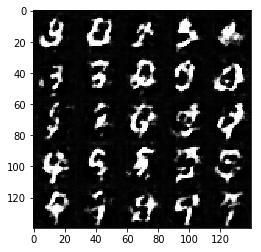

Epoch 1/2... Discriminator Loss: 0.4304... Generator Loss: 1.3996
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 0.6022
Epoch 1/2... Discriminator Loss: 0.4470... Generator Loss: 1.5765
Epoch 1/2... Discriminator Loss: 0.3253... Generator Loss: 1.7444
Epoch 1/2... Discriminator Loss: 0.3515... Generator Loss: 1.9875
Epoch 1/2... Discriminator Loss: 0.4866... Generator Loss: 3.1055
Epoch 1/2... Discriminator Loss: 1.2321... Generator Loss: 0.4917
Epoch 1/2... Discriminator Loss: 0.6775... Generator Loss: 1.1032
Epoch 1/2... Discriminator Loss: 0.4436... Generator Loss: 1.5403
Epoch 1/2... Discriminator Loss: 0.4924... Generator Loss: 1.2787


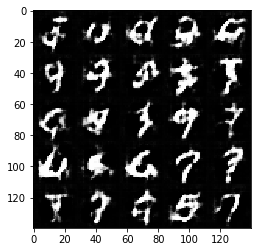

Epoch 1/2... Discriminator Loss: 0.3470... Generator Loss: 1.7904
Epoch 1/2... Discriminator Loss: 0.5697... Generator Loss: 1.1449
Epoch 1/2... Discriminator Loss: 0.4284... Generator Loss: 1.6601
Epoch 1/2... Discriminator Loss: 0.2769... Generator Loss: 2.0137
Epoch 1/2... Discriminator Loss: 0.4061... Generator Loss: 1.6444
Epoch 1/2... Discriminator Loss: 0.5983... Generator Loss: 3.5618
Epoch 1/2... Discriminator Loss: 0.4755... Generator Loss: 1.2055
Epoch 1/2... Discriminator Loss: 0.4996... Generator Loss: 1.5953
Epoch 1/2... Discriminator Loss: 0.7673... Generator Loss: 0.9238
Epoch 1/2... Discriminator Loss: 0.4537... Generator Loss: 1.6274


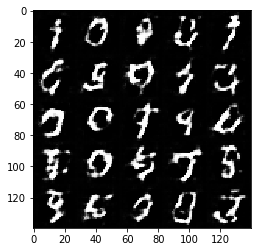

Epoch 1/2... Discriminator Loss: 0.3878... Generator Loss: 1.5503
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 1.4557
Epoch 1/2... Discriminator Loss: 0.4951... Generator Loss: 1.2268
Epoch 1/2... Discriminator Loss: 0.3686... Generator Loss: 1.4743
Epoch 1/2... Discriminator Loss: 0.9003... Generator Loss: 0.6836
Epoch 1/2... Discriminator Loss: 0.5817... Generator Loss: 2.0683
Epoch 1/2... Discriminator Loss: 0.7263... Generator Loss: 2.8523
Epoch 1/2... Discriminator Loss: 0.6501... Generator Loss: 1.8143
Epoch 1/2... Discriminator Loss: 0.6246... Generator Loss: 1.5248
Epoch 1/2... Discriminator Loss: 0.4399... Generator Loss: 1.4272


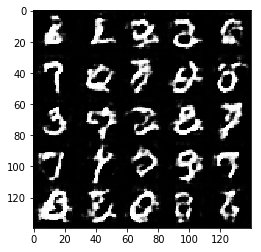

Epoch 1/2... Discriminator Loss: 0.5372... Generator Loss: 1.1332
Epoch 1/2... Discriminator Loss: 0.6651... Generator Loss: 1.0360
Epoch 1/2... Discriminator Loss: 0.4264... Generator Loss: 1.4932
Epoch 1/2... Discriminator Loss: 0.6288... Generator Loss: 1.0183
Epoch 1/2... Discriminator Loss: 0.2484... Generator Loss: 2.1646
Epoch 1/2... Discriminator Loss: 0.4383... Generator Loss: 1.3983
Epoch 1/2... Discriminator Loss: 0.3946... Generator Loss: 1.4199
Epoch 1/2... Discriminator Loss: 1.0057... Generator Loss: 0.6449
Epoch 1/2... Discriminator Loss: 0.5646... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 1.2042... Generator Loss: 0.4213


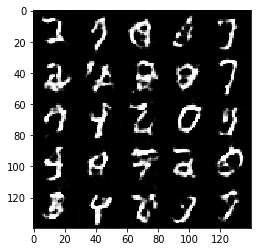

Epoch 1/2... Discriminator Loss: 1.3538... Generator Loss: 0.5104
Epoch 1/2... Discriminator Loss: 0.9684... Generator Loss: 1.0810
Epoch 1/2... Discriminator Loss: 0.7443... Generator Loss: 1.2155
Epoch 1/2... Discriminator Loss: 0.9773... Generator Loss: 0.7114
Epoch 1/2... Discriminator Loss: 0.6790... Generator Loss: 2.0460
Epoch 1/2... Discriminator Loss: 1.8721... Generator Loss: 3.8707
Epoch 1/2... Discriminator Loss: 0.7264... Generator Loss: 2.0928
Epoch 1/2... Discriminator Loss: 0.9601... Generator Loss: 1.8627
Epoch 1/2... Discriminator Loss: 0.4639... Generator Loss: 2.1099
Epoch 1/2... Discriminator Loss: 0.8415... Generator Loss: 0.8667


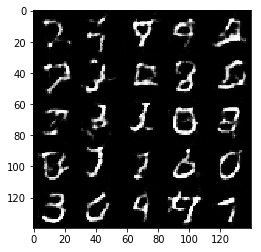

Epoch 1/2... Discriminator Loss: 0.6653... Generator Loss: 1.0530
Epoch 1/2... Discriminator Loss: 0.7697... Generator Loss: 0.9611
Epoch 1/2... Discriminator Loss: 1.0924... Generator Loss: 0.6150
Epoch 1/2... Discriminator Loss: 0.4760... Generator Loss: 1.2807
Epoch 1/2... Discriminator Loss: 1.2545... Generator Loss: 0.4227
Epoch 1/2... Discriminator Loss: 0.5503... Generator Loss: 1.1792
Epoch 1/2... Discriminator Loss: 0.6754... Generator Loss: 0.9695
Epoch 1/2... Discriminator Loss: 0.3211... Generator Loss: 2.1824
Epoch 1/2... Discriminator Loss: 0.9316... Generator Loss: 0.6430
Epoch 1/2... Discriminator Loss: 0.7912... Generator Loss: 0.7957


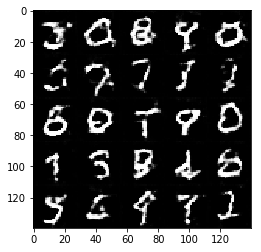

Epoch 1/2... Discriminator Loss: 0.3622... Generator Loss: 1.5949
Epoch 1/2... Discriminator Loss: 0.8089... Generator Loss: 0.7812
Epoch 1/2... Discriminator Loss: 0.3700... Generator Loss: 1.4874
Epoch 1/2... Discriminator Loss: 0.3638... Generator Loss: 1.5938
Epoch 1/2... Discriminator Loss: 2.3922... Generator Loss: 4.3006
Epoch 1/2... Discriminator Loss: 0.9001... Generator Loss: 1.2836
Epoch 1/2... Discriminator Loss: 0.9335... Generator Loss: 1.7098
Epoch 1/2... Discriminator Loss: 1.7236... Generator Loss: 3.8581
Epoch 1/2... Discriminator Loss: 1.7221... Generator Loss: 0.2819
Epoch 1/2... Discriminator Loss: 1.0712... Generator Loss: 0.6476


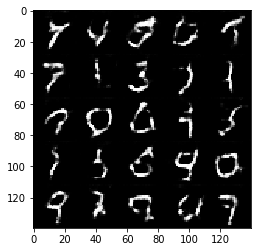

Epoch 1/2... Discriminator Loss: 1.5195... Generator Loss: 0.3300
Epoch 1/2... Discriminator Loss: 0.8308... Generator Loss: 1.5077
Epoch 1/2... Discriminator Loss: 1.6453... Generator Loss: 0.2927
Epoch 1/2... Discriminator Loss: 0.9303... Generator Loss: 2.9327
Epoch 1/2... Discriminator Loss: 0.7612... Generator Loss: 1.9783
Epoch 1/2... Discriminator Loss: 0.9611... Generator Loss: 0.6639
Epoch 1/2... Discriminator Loss: 1.1116... Generator Loss: 0.6046
Epoch 1/2... Discriminator Loss: 0.7592... Generator Loss: 0.8033
Epoch 1/2... Discriminator Loss: 0.7989... Generator Loss: 0.7992
Epoch 1/2... Discriminator Loss: 0.5319... Generator Loss: 1.2315


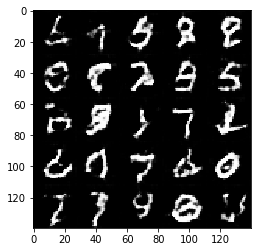

Epoch 1/2... Discriminator Loss: 0.6531... Generator Loss: 1.0042
Epoch 1/2... Discriminator Loss: 0.7922... Generator Loss: 0.8017
Epoch 1/2... Discriminator Loss: 0.4185... Generator Loss: 2.0286
Epoch 1/2... Discriminator Loss: 0.6453... Generator Loss: 1.0362
Epoch 1/2... Discriminator Loss: 0.7480... Generator Loss: 0.7999
Epoch 1/2... Discriminator Loss: 0.7299... Generator Loss: 0.8698
Epoch 1/2... Discriminator Loss: 0.3576... Generator Loss: 1.5003
Epoch 1/2... Discriminator Loss: 0.8121... Generator Loss: 0.7665
Epoch 1/2... Discriminator Loss: 1.4965... Generator Loss: 0.3397
Epoch 1/2... Discriminator Loss: 3.4071... Generator Loss: 5.0164


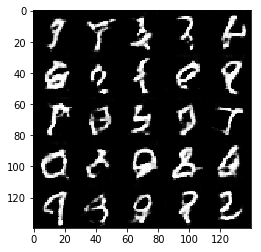

Epoch 1/2... Discriminator Loss: 0.7999... Generator Loss: 0.9572
Epoch 1/2... Discriminator Loss: 0.5621... Generator Loss: 1.8641
Epoch 1/2... Discriminator Loss: 0.7128... Generator Loss: 0.8959
Epoch 1/2... Discriminator Loss: 0.7661... Generator Loss: 0.9073
Epoch 1/2... Discriminator Loss: 0.4919... Generator Loss: 1.3315
Epoch 1/2... Discriminator Loss: 1.8469... Generator Loss: 0.2464
Epoch 1/2... Discriminator Loss: 0.7897... Generator Loss: 1.4275
Epoch 1/2... Discriminator Loss: 0.6502... Generator Loss: 1.9999
Epoch 1/2... Discriminator Loss: 1.8281... Generator Loss: 0.2293
Epoch 1/2... Discriminator Loss: 0.4518... Generator Loss: 1.6775


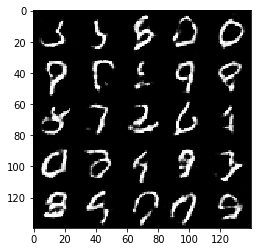

Epoch 1/2... Discriminator Loss: 0.4696... Generator Loss: 1.4524
Epoch 1/2... Discriminator Loss: 0.7051... Generator Loss: 0.9303
Epoch 1/2... Discriminator Loss: 0.5231... Generator Loss: 1.1756
Epoch 1/2... Discriminator Loss: 0.5161... Generator Loss: 1.1672
Epoch 1/2... Discriminator Loss: 0.6551... Generator Loss: 0.9473
Epoch 1/2... Discriminator Loss: 1.6612... Generator Loss: 0.3777
Epoch 1/2... Discriminator Loss: 0.5855... Generator Loss: 1.3348
Epoch 1/2... Discriminator Loss: 0.9745... Generator Loss: 0.5911
Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 1.1235
Epoch 1/2... Discriminator Loss: 0.5891... Generator Loss: 2.1803


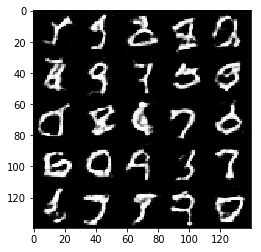

Epoch 1/2... Discriminator Loss: 0.6154... Generator Loss: 1.6863
Epoch 1/2... Discriminator Loss: 0.6827... Generator Loss: 0.9958
Epoch 1/2... Discriminator Loss: 0.6031... Generator Loss: 1.5912
Epoch 1/2... Discriminator Loss: 0.7830... Generator Loss: 0.9045
Epoch 1/2... Discriminator Loss: 0.4563... Generator Loss: 1.7913
Epoch 1/2... Discriminator Loss: 0.2357... Generator Loss: 2.5969
Epoch 1/2... Discriminator Loss: 0.3578... Generator Loss: 2.0279
Epoch 1/2... Discriminator Loss: 0.4797... Generator Loss: 1.2954
Epoch 1/2... Discriminator Loss: 0.4227... Generator Loss: 1.3734
Epoch 1/2... Discriminator Loss: 0.7157... Generator Loss: 2.9947


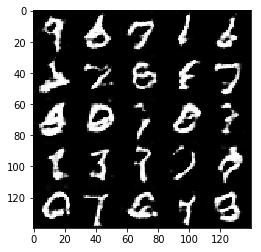

Epoch 1/2... Discriminator Loss: 0.7847... Generator Loss: 0.8539
Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 0.8086
Epoch 1/2... Discriminator Loss: 0.4685... Generator Loss: 1.5938
Epoch 1/2... Discriminator Loss: 0.3051... Generator Loss: 1.8065
Epoch 1/2... Discriminator Loss: 1.2505... Generator Loss: 0.3905
Epoch 1/2... Discriminator Loss: 0.4482... Generator Loss: 1.6001
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 0.8363
Epoch 1/2... Discriminator Loss: 0.8465... Generator Loss: 0.7892
Epoch 1/2... Discriminator Loss: 0.6133... Generator Loss: 1.0711
Epoch 1/2... Discriminator Loss: 0.9705... Generator Loss: 0.6910


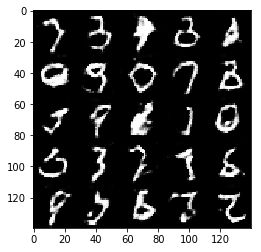

Epoch 1/2... Discriminator Loss: 0.4182... Generator Loss: 1.4632
Epoch 1/2... Discriminator Loss: 0.4483... Generator Loss: 1.5472
Epoch 1/2... Discriminator Loss: 0.3737... Generator Loss: 1.5525
Epoch 1/2... Discriminator Loss: 0.6998... Generator Loss: 0.9658
Epoch 1/2... Discriminator Loss: 0.7633... Generator Loss: 0.9083
Epoch 1/2... Discriminator Loss: 0.7518... Generator Loss: 2.2687
Epoch 1/2... Discriminator Loss: 0.8962... Generator Loss: 2.3842
Epoch 1/2... Discriminator Loss: 0.7361... Generator Loss: 1.0053
Epoch 1/2... Discriminator Loss: 0.7261... Generator Loss: 2.2770
Epoch 1/2... Discriminator Loss: 0.7423... Generator Loss: 0.8694


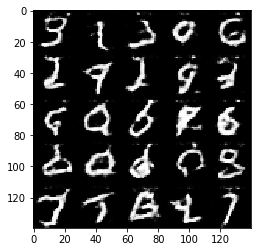

Epoch 1/2... Discriminator Loss: 0.5454... Generator Loss: 2.3277
Epoch 1/2... Discriminator Loss: 0.7871... Generator Loss: 3.0500
Epoch 1/2... Discriminator Loss: 0.6461... Generator Loss: 2.6012
Epoch 1/2... Discriminator Loss: 0.4102... Generator Loss: 1.7882
Epoch 1/2... Discriminator Loss: 0.5223... Generator Loss: 1.3590
Epoch 1/2... Discriminator Loss: 0.5455... Generator Loss: 1.2861
Epoch 1/2... Discriminator Loss: 0.6149... Generator Loss: 1.1557
Epoch 2/2... Discriminator Loss: 0.4083... Generator Loss: 2.4767
Epoch 2/2... Discriminator Loss: 0.2933... Generator Loss: 2.5216
Epoch 2/2... Discriminator Loss: 0.4806... Generator Loss: 1.4275


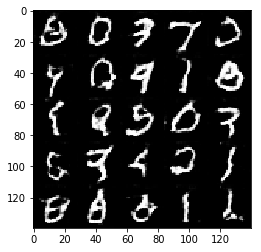

Epoch 2/2... Discriminator Loss: 0.4567... Generator Loss: 1.4945
Epoch 2/2... Discriminator Loss: 0.2989... Generator Loss: 1.9050
Epoch 2/2... Discriminator Loss: 0.7494... Generator Loss: 0.9306
Epoch 2/2... Discriminator Loss: 0.3577... Generator Loss: 1.4776
Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 1.0726
Epoch 2/2... Discriminator Loss: 0.7497... Generator Loss: 0.8814
Epoch 2/2... Discriminator Loss: 0.5842... Generator Loss: 1.3033
Epoch 2/2... Discriminator Loss: 0.8424... Generator Loss: 0.8278
Epoch 2/2... Discriminator Loss: 0.5937... Generator Loss: 1.1792
Epoch 2/2... Discriminator Loss: 0.6062... Generator Loss: 1.0309


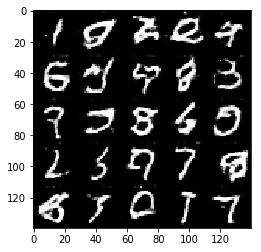

Epoch 2/2... Discriminator Loss: 0.3590... Generator Loss: 1.7543
Epoch 2/2... Discriminator Loss: 0.4449... Generator Loss: 1.3069
Epoch 2/2... Discriminator Loss: 0.2990... Generator Loss: 1.9051
Epoch 2/2... Discriminator Loss: 0.4710... Generator Loss: 1.2414
Epoch 2/2... Discriminator Loss: 0.7682... Generator Loss: 0.9579
Epoch 2/2... Discriminator Loss: 0.6900... Generator Loss: 0.9878
Epoch 2/2... Discriminator Loss: 0.7677... Generator Loss: 2.6685
Epoch 2/2... Discriminator Loss: 0.9758... Generator Loss: 0.6717
Epoch 2/2... Discriminator Loss: 1.1540... Generator Loss: 0.5656
Epoch 2/2... Discriminator Loss: 0.7584... Generator Loss: 1.5164


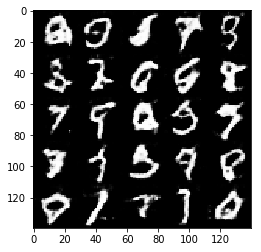

Epoch 2/2... Discriminator Loss: 0.8180... Generator Loss: 2.1674
Epoch 2/2... Discriminator Loss: 0.5221... Generator Loss: 1.4718
Epoch 2/2... Discriminator Loss: 0.5543... Generator Loss: 2.0605
Epoch 2/2... Discriminator Loss: 1.0341... Generator Loss: 0.6179
Epoch 2/2... Discriminator Loss: 0.7374... Generator Loss: 0.9435
Epoch 2/2... Discriminator Loss: 0.6400... Generator Loss: 2.1164
Epoch 2/2... Discriminator Loss: 0.6737... Generator Loss: 1.1047
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 0.6347
Epoch 2/2... Discriminator Loss: 1.0580... Generator Loss: 2.9001
Epoch 2/2... Discriminator Loss: 0.4366... Generator Loss: 1.6267


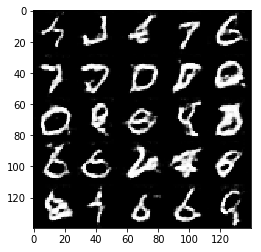

Epoch 2/2... Discriminator Loss: 0.3426... Generator Loss: 2.4627
Epoch 2/2... Discriminator Loss: 0.4888... Generator Loss: 1.6475
Epoch 2/2... Discriminator Loss: 0.3751... Generator Loss: 2.0523
Epoch 2/2... Discriminator Loss: 0.5260... Generator Loss: 1.3244
Epoch 2/2... Discriminator Loss: 0.4672... Generator Loss: 1.3943
Epoch 2/2... Discriminator Loss: 0.3914... Generator Loss: 1.9942
Epoch 2/2... Discriminator Loss: 0.3782... Generator Loss: 1.5187
Epoch 2/2... Discriminator Loss: 0.7568... Generator Loss: 1.3558
Epoch 2/2... Discriminator Loss: 0.5073... Generator Loss: 1.3096
Epoch 2/2... Discriminator Loss: 0.3598... Generator Loss: 1.9913


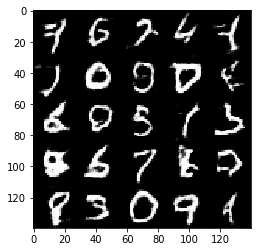

Epoch 2/2... Discriminator Loss: 1.3035... Generator Loss: 0.4354
Epoch 2/2... Discriminator Loss: 0.3169... Generator Loss: 1.9809
Epoch 2/2... Discriminator Loss: 0.7222... Generator Loss: 0.9339
Epoch 2/2... Discriminator Loss: 0.4998... Generator Loss: 1.2150
Epoch 2/2... Discriminator Loss: 0.4665... Generator Loss: 1.2403
Epoch 2/2... Discriminator Loss: 0.5018... Generator Loss: 1.3805
Epoch 2/2... Discriminator Loss: 0.5921... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 0.7313... Generator Loss: 0.9293
Epoch 2/2... Discriminator Loss: 0.6304... Generator Loss: 1.2013
Epoch 2/2... Discriminator Loss: 0.3440... Generator Loss: 1.9925


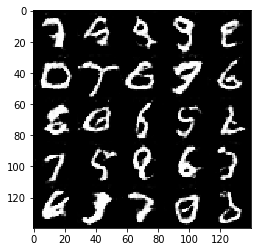

Epoch 2/2... Discriminator Loss: 0.5730... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 0.8896
Epoch 2/2... Discriminator Loss: 1.7697... Generator Loss: 0.2696
Epoch 2/2... Discriminator Loss: 0.6466... Generator Loss: 1.1152
Epoch 2/2... Discriminator Loss: 0.3999... Generator Loss: 1.3708
Epoch 2/2... Discriminator Loss: 0.6980... Generator Loss: 0.7980
Epoch 2/2... Discriminator Loss: 0.3105... Generator Loss: 1.7639
Epoch 2/2... Discriminator Loss: 0.5329... Generator Loss: 1.1391
Epoch 2/2... Discriminator Loss: 0.8187... Generator Loss: 0.9466
Epoch 2/2... Discriminator Loss: 0.4455... Generator Loss: 1.4558


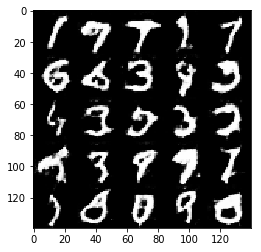

Epoch 2/2... Discriminator Loss: 0.4283... Generator Loss: 1.8481
Epoch 2/2... Discriminator Loss: 0.3221... Generator Loss: 1.8035
Epoch 2/2... Discriminator Loss: 0.5890... Generator Loss: 1.3127
Epoch 2/2... Discriminator Loss: 0.5930... Generator Loss: 3.9879
Epoch 2/2... Discriminator Loss: 0.4977... Generator Loss: 1.3294
Epoch 2/2... Discriminator Loss: 0.4267... Generator Loss: 1.5014
Epoch 2/2... Discriminator Loss: 0.3943... Generator Loss: 1.4160
Epoch 2/2... Discriminator Loss: 0.4517... Generator Loss: 1.3823
Epoch 2/2... Discriminator Loss: 0.3695... Generator Loss: 1.6963
Epoch 2/2... Discriminator Loss: 0.5830... Generator Loss: 1.0686


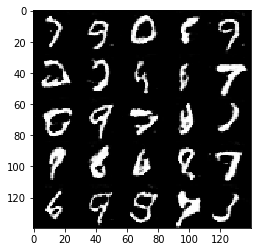

Epoch 2/2... Discriminator Loss: 0.2173... Generator Loss: 2.2060
Epoch 2/2... Discriminator Loss: 0.3521... Generator Loss: 1.7891
Epoch 2/2... Discriminator Loss: 0.3135... Generator Loss: 1.9929
Epoch 2/2... Discriminator Loss: 0.3715... Generator Loss: 1.6628
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 0.8529
Epoch 2/2... Discriminator Loss: 0.2832... Generator Loss: 1.9767
Epoch 2/2... Discriminator Loss: 4.5599... Generator Loss: 0.0316
Epoch 2/2... Discriminator Loss: 0.7189... Generator Loss: 1.1857
Epoch 2/2... Discriminator Loss: 0.4489... Generator Loss: 1.5183
Epoch 2/2... Discriminator Loss: 0.2393... Generator Loss: 2.4296


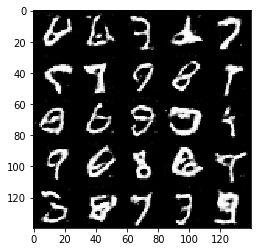

Epoch 2/2... Discriminator Loss: 0.5595... Generator Loss: 1.2174
Epoch 2/2... Discriminator Loss: 0.6717... Generator Loss: 1.0474
Epoch 2/2... Discriminator Loss: 0.4028... Generator Loss: 1.8286
Epoch 2/2... Discriminator Loss: 0.4281... Generator Loss: 1.7814
Epoch 2/2... Discriminator Loss: 0.6661... Generator Loss: 1.1427
Epoch 2/2... Discriminator Loss: 0.4713... Generator Loss: 1.2815
Epoch 2/2... Discriminator Loss: 0.5087... Generator Loss: 1.5535
Epoch 2/2... Discriminator Loss: 0.6438... Generator Loss: 1.1497
Epoch 2/2... Discriminator Loss: 0.3020... Generator Loss: 1.9873
Epoch 2/2... Discriminator Loss: 0.4195... Generator Loss: 1.5040


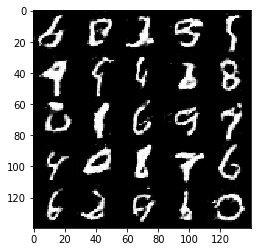

Epoch 2/2... Discriminator Loss: 0.3221... Generator Loss: 1.9191
Epoch 2/2... Discriminator Loss: 0.4179... Generator Loss: 1.6276
Epoch 2/2... Discriminator Loss: 0.2222... Generator Loss: 2.1526
Epoch 2/2... Discriminator Loss: 0.6795... Generator Loss: 1.0509
Epoch 2/2... Discriminator Loss: 0.2164... Generator Loss: 2.1947
Epoch 2/2... Discriminator Loss: 1.0500... Generator Loss: 2.1612
Epoch 2/2... Discriminator Loss: 0.4064... Generator Loss: 1.8674
Epoch 2/2... Discriminator Loss: 0.4581... Generator Loss: 1.4937
Epoch 2/2... Discriminator Loss: 0.3822... Generator Loss: 1.9904
Epoch 2/2... Discriminator Loss: 0.3841... Generator Loss: 2.0869


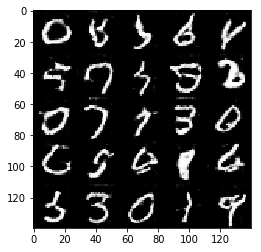

Epoch 2/2... Discriminator Loss: 0.4647... Generator Loss: 1.3456
Epoch 2/2... Discriminator Loss: 0.1694... Generator Loss: 3.4600
Epoch 2/2... Discriminator Loss: 0.4597... Generator Loss: 1.4006
Epoch 2/2... Discriminator Loss: 0.2819... Generator Loss: 1.7897
Epoch 2/2... Discriminator Loss: 0.5316... Generator Loss: 1.4142
Epoch 2/2... Discriminator Loss: 0.8733... Generator Loss: 0.8469
Epoch 2/2... Discriminator Loss: 0.4524... Generator Loss: 1.6841
Epoch 2/2... Discriminator Loss: 0.6213... Generator Loss: 1.3148
Epoch 2/2... Discriminator Loss: 0.8566... Generator Loss: 0.8020
Epoch 2/2... Discriminator Loss: 0.4163... Generator Loss: 2.6306


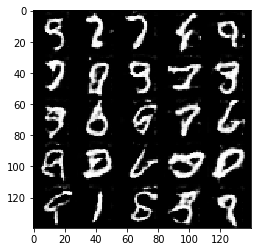

Epoch 2/2... Discriminator Loss: 0.4213... Generator Loss: 1.4932
Epoch 2/2... Discriminator Loss: 0.4650... Generator Loss: 1.9023
Epoch 2/2... Discriminator Loss: 0.8093... Generator Loss: 0.7988
Epoch 2/2... Discriminator Loss: 1.8420... Generator Loss: 0.2704
Epoch 2/2... Discriminator Loss: 0.4440... Generator Loss: 1.6940
Epoch 2/2... Discriminator Loss: 0.8059... Generator Loss: 0.8388
Epoch 2/2... Discriminator Loss: 1.7565... Generator Loss: 0.3040
Epoch 2/2... Discriminator Loss: 0.4476... Generator Loss: 1.4612
Epoch 2/2... Discriminator Loss: 0.5476... Generator Loss: 1.6949
Epoch 2/2... Discriminator Loss: 0.6064... Generator Loss: 1.2876


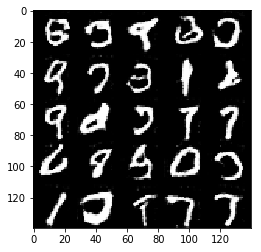

Epoch 2/2... Discriminator Loss: 0.4696... Generator Loss: 1.6698
Epoch 2/2... Discriminator Loss: 0.5594... Generator Loss: 1.2247
Epoch 2/2... Discriminator Loss: 1.4745... Generator Loss: 4.6986
Epoch 2/2... Discriminator Loss: 0.5791... Generator Loss: 2.4244
Epoch 2/2... Discriminator Loss: 0.8487... Generator Loss: 0.8536
Epoch 2/2... Discriminator Loss: 0.4499... Generator Loss: 2.8609
Epoch 2/2... Discriminator Loss: 0.6352... Generator Loss: 1.0143
Epoch 2/2... Discriminator Loss: 0.4523... Generator Loss: 1.5040
Epoch 2/2... Discriminator Loss: 0.3903... Generator Loss: 2.4281
Epoch 2/2... Discriminator Loss: 0.3614... Generator Loss: 1.6981


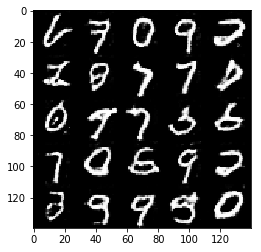

Epoch 2/2... Discriminator Loss: 1.4981... Generator Loss: 0.3994
Epoch 2/2... Discriminator Loss: 0.6051... Generator Loss: 1.0869
Epoch 2/2... Discriminator Loss: 0.3872... Generator Loss: 3.2624
Epoch 2/2... Discriminator Loss: 1.1541... Generator Loss: 0.6427
Epoch 2/2... Discriminator Loss: 0.3613... Generator Loss: 2.5222
Epoch 2/2... Discriminator Loss: 1.2976... Generator Loss: 0.5196
Epoch 2/2... Discriminator Loss: 0.5533... Generator Loss: 1.4012
Epoch 2/2... Discriminator Loss: 0.7789... Generator Loss: 0.9318
Epoch 2/2... Discriminator Loss: 0.3913... Generator Loss: 1.3374
Epoch 2/2... Discriminator Loss: 0.3814... Generator Loss: 1.6987


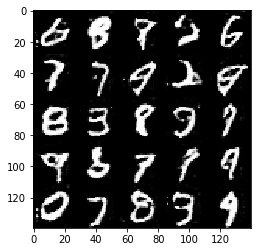

Epoch 2/2... Discriminator Loss: 0.6257... Generator Loss: 0.9595
Epoch 2/2... Discriminator Loss: 0.3912... Generator Loss: 1.4913
Epoch 2/2... Discriminator Loss: 0.7127... Generator Loss: 1.0662
Epoch 2/2... Discriminator Loss: 11.8759... Generator Loss: 15.3979
Epoch 2/2... Discriminator Loss: 0.8431... Generator Loss: 1.4812
Epoch 2/2... Discriminator Loss: 0.5984... Generator Loss: 2.1323
Epoch 2/2... Discriminator Loss: 0.5873... Generator Loss: 2.3710
Epoch 2/2... Discriminator Loss: 0.5453... Generator Loss: 2.5660
Epoch 2/2... Discriminator Loss: 0.6513... Generator Loss: 1.1072
Epoch 2/2... Discriminator Loss: 0.4440... Generator Loss: 2.0251


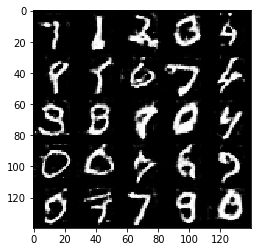

Epoch 2/2... Discriminator Loss: 0.4061... Generator Loss: 2.1084
Epoch 2/2... Discriminator Loss: 0.4102... Generator Loss: 1.7942
Epoch 2/2... Discriminator Loss: 0.3219... Generator Loss: 1.7715
Epoch 2/2... Discriminator Loss: 0.4503... Generator Loss: 1.4337
Epoch 2/2... Discriminator Loss: 0.9207... Generator Loss: 0.7930
Epoch 2/2... Discriminator Loss: 0.4463... Generator Loss: 1.4823
Epoch 2/2... Discriminator Loss: 0.7763... Generator Loss: 1.0240
Epoch 2/2... Discriminator Loss: 0.7080... Generator Loss: 0.8646
Epoch 2/2... Discriminator Loss: 0.4782... Generator Loss: 1.3217
Epoch 2/2... Discriminator Loss: 0.3950... Generator Loss: 1.8115


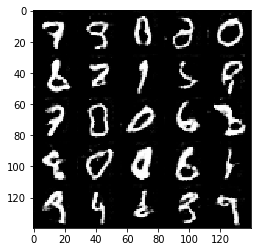

Epoch 2/2... Discriminator Loss: 0.8484... Generator Loss: 0.8258
Epoch 2/2... Discriminator Loss: 0.9112... Generator Loss: 0.7792
Epoch 2/2... Discriminator Loss: 0.9450... Generator Loss: 0.8498
Epoch 2/2... Discriminator Loss: 1.4868... Generator Loss: 4.2729
Epoch 2/2... Discriminator Loss: 0.5408... Generator Loss: 2.1375
Epoch 2/2... Discriminator Loss: 0.3901... Generator Loss: 1.8988
Epoch 2/2... Discriminator Loss: 0.4137... Generator Loss: 2.6185
Epoch 2/2... Discriminator Loss: 0.4514... Generator Loss: 2.9634
Epoch 2/2... Discriminator Loss: 0.3919... Generator Loss: 1.9806
Epoch 2/2... Discriminator Loss: 0.3925... Generator Loss: 2.1185


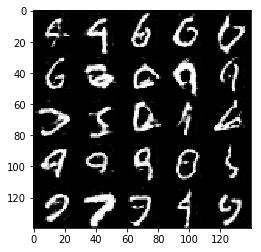

Epoch 2/2... Discriminator Loss: 0.8595... Generator Loss: 0.8312
Epoch 2/2... Discriminator Loss: 0.4973... Generator Loss: 1.3461
Epoch 2/2... Discriminator Loss: 1.7064... Generator Loss: 5.5721
Epoch 2/2... Discriminator Loss: 0.5100... Generator Loss: 1.3312
Epoch 2/2... Discriminator Loss: 0.7475... Generator Loss: 0.9237
Epoch 2/2... Discriminator Loss: 0.9395... Generator Loss: 0.7659
Epoch 2/2... Discriminator Loss: 0.2987... Generator Loss: 2.1082
Epoch 2/2... Discriminator Loss: 0.9048... Generator Loss: 0.7950
Epoch 2/2... Discriminator Loss: 0.1329... Generator Loss: 4.4431
Epoch 2/2... Discriminator Loss: 0.5774... Generator Loss: 1.2096


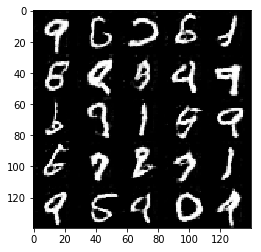

Epoch 2/2... Discriminator Loss: 0.4993... Generator Loss: 1.2459
Epoch 2/2... Discriminator Loss: 0.5849... Generator Loss: 1.0682
Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 0.6508
Epoch 2/2... Discriminator Loss: 0.7022... Generator Loss: 0.9587
Epoch 2/2... Discriminator Loss: 0.1882... Generator Loss: 2.0704


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0592... Generator Loss: 0.5989
Epoch 1/1... Discriminator Loss: 0.4921... Generator Loss: 1.2970
Epoch 1/1... Discriminator Loss: 0.3100... Generator Loss: 1.6846
Epoch 1/1... Discriminator Loss: 0.1367... Generator Loss: 2.5718
Epoch 1/1... Discriminator Loss: 0.0795... Generator Loss: 4.0108
Epoch 1/1... Discriminator Loss: 0.6396... Generator Loss: 2.1969
Epoch 1/1... Discriminator Loss: 0.6303... Generator Loss: 1.7744
Epoch 1/1... Discriminator Loss: 0.7777... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 1.1903... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.3788


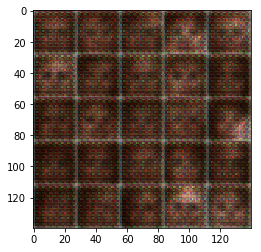

Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 2.9833
Epoch 1/1... Discriminator Loss: 1.3427... Generator Loss: 0.4780
Epoch 1/1... Discriminator Loss: 0.6040... Generator Loss: 1.3466
Epoch 1/1... Discriminator Loss: 0.8995... Generator Loss: 0.8512
Epoch 1/1... Discriminator Loss: 0.8664... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 0.9417
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 1.8118... Generator Loss: 0.2237
Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 1.0346
Epoch 1/1... Discriminator Loss: 0.8091... Generator Loss: 1.1939


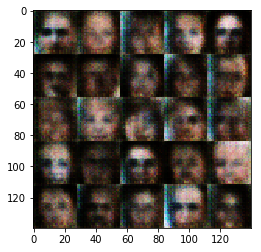

Epoch 1/1... Discriminator Loss: 1.5667... Generator Loss: 0.3079
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 0.5538
Epoch 1/1... Discriminator Loss: 0.9016... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.5822... Generator Loss: 0.3362
Epoch 1/1... Discriminator Loss: 0.6256... Generator Loss: 1.2863
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.4620
Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 1.0585
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 2.8089
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.0192... Generator Loss: 0.6522


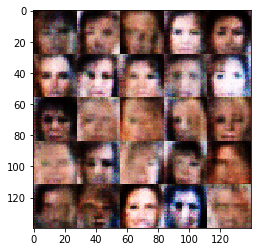

Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 2.3188
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 2.2820
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 0.6074
Epoch 1/1... Discriminator Loss: 0.7848... Generator Loss: 0.9621
Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.4124
Epoch 1/1... Discriminator Loss: 2.1293... Generator Loss: 0.1878
Epoch 1/1... Discriminator Loss: 0.7630... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.0470... Generator Loss: 0.7230
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.4957


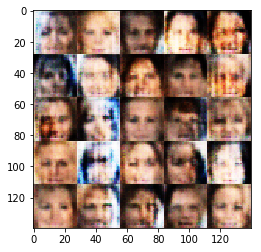

Epoch 1/1... Discriminator Loss: 0.8704... Generator Loss: 1.1521
Epoch 1/1... Discriminator Loss: 1.1149... Generator Loss: 0.6053
Epoch 1/1... Discriminator Loss: 1.2654... Generator Loss: 0.4567
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.4848
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 1.7320
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 1.5171
Epoch 1/1... Discriminator Loss: 0.9334... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.6358... Generator Loss: 0.2657
Epoch 1/1... Discriminator Loss: 1.5594... Generator Loss: 0.3761


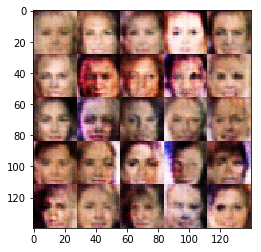

Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 0.5724
Epoch 1/1... Discriminator Loss: 1.0585... Generator Loss: 1.2062
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 1.5188
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 1.2610
Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 0.7808
Epoch 1/1... Discriminator Loss: 1.1814... Generator Loss: 0.5289
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.5089
Epoch 1/1... Discriminator Loss: 1.3189... Generator Loss: 2.6711


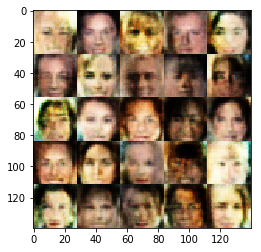

Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 1.7057
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 0.8995
Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 0.4849
Epoch 1/1... Discriminator Loss: 1.0569... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 2.0102
Epoch 1/1... Discriminator Loss: 0.7219... Generator Loss: 1.3562
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.5599
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 1.8368
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 1.6051
Epoch 1/1... Discriminator Loss: 0.9843... Generator Loss: 1.3156


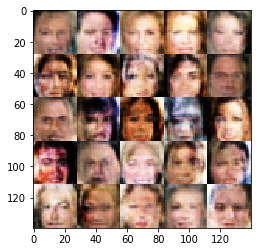

Epoch 1/1... Discriminator Loss: 0.8573... Generator Loss: 1.3847
Epoch 1/1... Discriminator Loss: 0.8864... Generator Loss: 1.0711
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 1.5270
Epoch 1/1... Discriminator Loss: 1.6314... Generator Loss: 2.1949
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 1.2777
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.2105
Epoch 1/1... Discriminator Loss: 0.8803... Generator Loss: 1.4301
Epoch 1/1... Discriminator Loss: 0.8377... Generator Loss: 1.0009
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.0612
Epoch 1/1... Discriminator Loss: 0.8830... Generator Loss: 0.8667


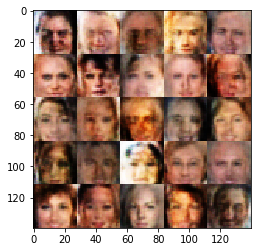

Epoch 1/1... Discriminator Loss: 1.8055... Generator Loss: 2.1771
Epoch 1/1... Discriminator Loss: 0.9466... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 0.9495
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 0.8157... Generator Loss: 1.6081
Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 0.9040
Epoch 1/1... Discriminator Loss: 1.1996... Generator Loss: 0.4712
Epoch 1/1... Discriminator Loss: 1.2126... Generator Loss: 0.4616
Epoch 1/1... Discriminator Loss: 0.6753... Generator Loss: 1.3069


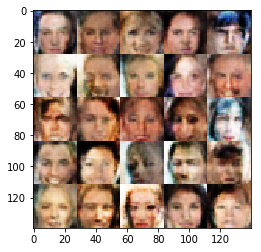

Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 0.7869... Generator Loss: 1.3413
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 1.0473
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 1.3159
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.3911
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 1.0802
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 0.7352... Generator Loss: 1.0331
Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.4341
Epoch 1/1... Discriminator Loss: 1.0090... Generator Loss: 1.2492


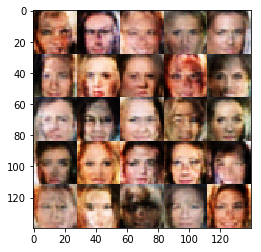

Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 0.3960
Epoch 1/1... Discriminator Loss: 0.6514... Generator Loss: 2.4142
Epoch 1/1... Discriminator Loss: 1.1391... Generator Loss: 0.8608
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 1.0830... Generator Loss: 0.5275
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 2.1595
Epoch 1/1... Discriminator Loss: 0.5400... Generator Loss: 1.8709
Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 1.3605
Epoch 1/1... Discriminator Loss: 0.8819... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 0.6820


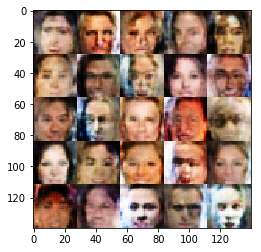

Epoch 1/1... Discriminator Loss: 1.4898... Generator Loss: 1.9369
Epoch 1/1... Discriminator Loss: 0.8424... Generator Loss: 1.0895
Epoch 1/1... Discriminator Loss: 0.8056... Generator Loss: 1.7096
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 2.6380
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 0.8287
Epoch 1/1... Discriminator Loss: 0.6825... Generator Loss: 1.1356
Epoch 1/1... Discriminator Loss: 1.0114... Generator Loss: 0.6314
Epoch 1/1... Discriminator Loss: 1.5584... Generator Loss: 2.0618
Epoch 1/1... Discriminator Loss: 0.7541... Generator Loss: 1.6053
Epoch 1/1... Discriminator Loss: 1.6137... Generator Loss: 0.2955


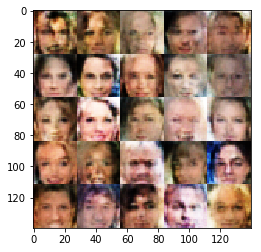

Epoch 1/1... Discriminator Loss: 1.5870... Generator Loss: 0.7984
Epoch 1/1... Discriminator Loss: 0.5696... Generator Loss: 2.1638
Epoch 1/1... Discriminator Loss: 1.9393... Generator Loss: 0.2042
Epoch 1/1... Discriminator Loss: 1.3289... Generator Loss: 2.9885
Epoch 1/1... Discriminator Loss: 0.4972... Generator Loss: 1.7778
Epoch 1/1... Discriminator Loss: 0.8862... Generator Loss: 0.8125
Epoch 1/1... Discriminator Loss: 0.4711... Generator Loss: 1.9731
Epoch 1/1... Discriminator Loss: 0.5524... Generator Loss: 1.6176
Epoch 1/1... Discriminator Loss: 0.5860... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 0.8696... Generator Loss: 1.3277


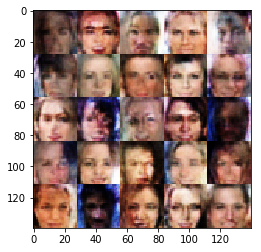

Epoch 1/1... Discriminator Loss: 0.7631... Generator Loss: 1.0759
Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 0.4550
Epoch 1/1... Discriminator Loss: 0.8016... Generator Loss: 1.4718
Epoch 1/1... Discriminator Loss: 0.8974... Generator Loss: 1.4891
Epoch 1/1... Discriminator Loss: 1.8905... Generator Loss: 0.2142
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 0.6739... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 0.6266... Generator Loss: 1.7901
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 0.8833... Generator Loss: 1.2377


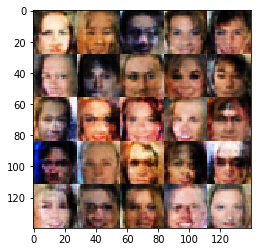

Epoch 1/1... Discriminator Loss: 1.1090... Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 0.6138... Generator Loss: 1.1130
Epoch 1/1... Discriminator Loss: 0.7147... Generator Loss: 1.5117
Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 0.6638... Generator Loss: 2.2837
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.3569
Epoch 1/1... Discriminator Loss: 0.5344... Generator Loss: 1.6990
Epoch 1/1... Discriminator Loss: 0.6073... Generator Loss: 2.0789
Epoch 1/1... Discriminator Loss: 0.7853... Generator Loss: 0.9049


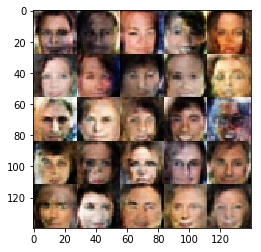

Epoch 1/1... Discriminator Loss: 0.3769... Generator Loss: 1.6023
Epoch 1/1... Discriminator Loss: 0.7541... Generator Loss: 1.1495
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 0.5597... Generator Loss: 1.2938
Epoch 1/1... Discriminator Loss: 1.1245... Generator Loss: 1.9783
Epoch 1/1... Discriminator Loss: 1.5314... Generator Loss: 0.3233
Epoch 1/1... Discriminator Loss: 0.8462... Generator Loss: 0.9944
Epoch 1/1... Discriminator Loss: 0.5317... Generator Loss: 1.6774
Epoch 1/1... Discriminator Loss: 0.6471... Generator Loss: 1.4836
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 0.9811


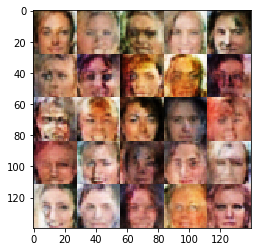

Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 1.2324
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 1.0287
Epoch 1/1... Discriminator Loss: 0.8413... Generator Loss: 1.8928
Epoch 1/1... Discriminator Loss: 0.4074... Generator Loss: 2.3208
Epoch 1/1... Discriminator Loss: 0.9113... Generator Loss: 1.3667
Epoch 1/1... Discriminator Loss: 1.5577... Generator Loss: 0.2896
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.3888
Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.3919
Epoch 1/1... Discriminator Loss: 0.8104... Generator Loss: 1.6324
Epoch 1/1... Discriminator Loss: 0.7020... Generator Loss: 1.9711


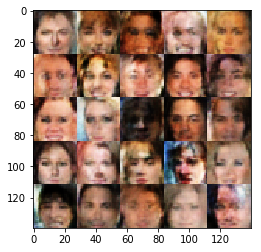

Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 0.4530
Epoch 1/1... Discriminator Loss: 0.5716... Generator Loss: 1.3855
Epoch 1/1... Discriminator Loss: 0.6516... Generator Loss: 1.5131
Epoch 1/1... Discriminator Loss: 0.8054... Generator Loss: 0.8265
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 1.6891
Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 0.6800... Generator Loss: 1.5306
Epoch 1/1... Discriminator Loss: 1.6645... Generator Loss: 0.2715
Epoch 1/1... Discriminator Loss: 0.6152... Generator Loss: 2.2588


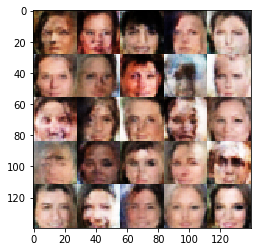

Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 1.6446... Generator Loss: 4.9849
Epoch 1/1... Discriminator Loss: 0.6003... Generator Loss: 1.7275
Epoch 1/1... Discriminator Loss: 0.5861... Generator Loss: 1.2339
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 1.3388
Epoch 1/1... Discriminator Loss: 0.5232... Generator Loss: 1.4404
Epoch 1/1... Discriminator Loss: 0.7957... Generator Loss: 1.0166
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 0.9748... Generator Loss: 2.5155
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.4373


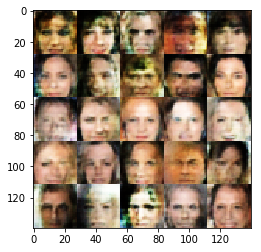

Epoch 1/1... Discriminator Loss: 1.5200... Generator Loss: 2.5348
Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 0.9854... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 0.7738... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 0.6426... Generator Loss: 1.0406
Epoch 1/1... Discriminator Loss: 0.5622... Generator Loss: 1.4648
Epoch 1/1... Discriminator Loss: 0.8186... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 2.4115... Generator Loss: 0.1317
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 1.0584


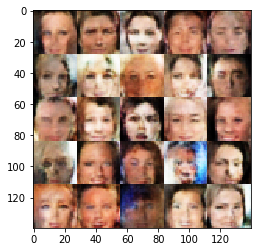

Epoch 1/1... Discriminator Loss: 0.7047... Generator Loss: 1.7099
Epoch 1/1... Discriminator Loss: 0.8483... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 0.3912... Generator Loss: 1.7173
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 1.1845
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 0.7918... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 0.9434... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 0.7371... Generator Loss: 1.2317
Epoch 1/1... Discriminator Loss: 0.6847... Generator Loss: 1.4405
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 1.6484


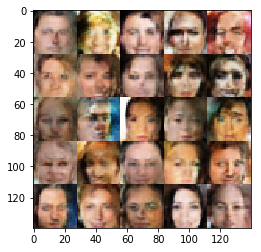

Epoch 1/1... Discriminator Loss: 0.7037... Generator Loss: 1.0218
Epoch 1/1... Discriminator Loss: 0.9647... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 0.5139... Generator Loss: 1.7341
Epoch 1/1... Discriminator Loss: 0.8026... Generator Loss: 0.8513
Epoch 1/1... Discriminator Loss: 0.8433... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 1.0892... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 0.6353... Generator Loss: 1.6198
Epoch 1/1... Discriminator Loss: 1.6746... Generator Loss: 3.7921
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 1.5723
Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 0.9430


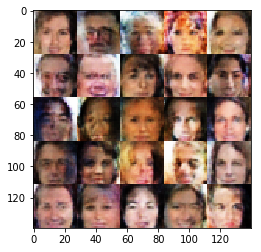

Epoch 1/1... Discriminator Loss: 0.9704... Generator Loss: 1.0226
Epoch 1/1... Discriminator Loss: 0.9988... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.0026... Generator Loss: 0.7057
Epoch 1/1... Discriminator Loss: 0.7222... Generator Loss: 1.7814
Epoch 1/1... Discriminator Loss: 1.0249... Generator Loss: 0.6399
Epoch 1/1... Discriminator Loss: 0.6799... Generator Loss: 1.0790
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 0.5609... Generator Loss: 1.3724
Epoch 1/1... Discriminator Loss: 0.8107... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 0.6717... Generator Loss: 1.1100


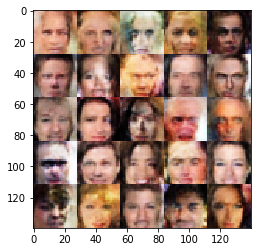

Epoch 1/1... Discriminator Loss: 0.7956... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 0.6244... Generator Loss: 1.5413
Epoch 1/1... Discriminator Loss: 0.5112... Generator Loss: 2.0840
Epoch 1/1... Discriminator Loss: 2.9584... Generator Loss: 0.0967
Epoch 1/1... Discriminator Loss: 0.8009... Generator Loss: 0.7993
Epoch 1/1... Discriminator Loss: 0.7980... Generator Loss: 1.3096
Epoch 1/1... Discriminator Loss: 0.7064... Generator Loss: 1.9273
Epoch 1/1... Discriminator Loss: 0.4534... Generator Loss: 1.4006
Epoch 1/1... Discriminator Loss: 0.5818... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 0.6660... Generator Loss: 1.3754


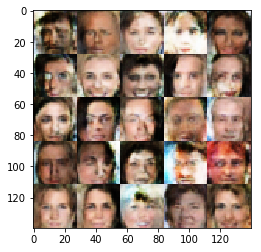

Epoch 1/1... Discriminator Loss: 0.7094... Generator Loss: 1.6998
Epoch 1/1... Discriminator Loss: 0.8968... Generator Loss: 0.7231
Epoch 1/1... Discriminator Loss: 0.8574... Generator Loss: 0.7762
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 0.7737... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 0.3902... Generator Loss: 1.9155
Epoch 1/1... Discriminator Loss: 1.0530... Generator Loss: 0.5955
Epoch 1/1... Discriminator Loss: 0.6891... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 2.0122... Generator Loss: 0.2307
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.4561


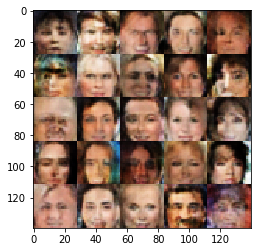

Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 0.7211
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 0.8504... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 0.7119... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 0.7735... Generator Loss: 0.7712
Epoch 1/1... Discriminator Loss: 0.8603... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 0.7274... Generator Loss: 1.3423
Epoch 1/1... Discriminator Loss: 0.6400... Generator Loss: 1.1364


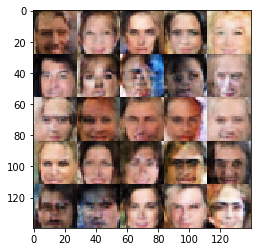

Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 0.4635... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 0.5791... Generator Loss: 1.2982
Epoch 1/1... Discriminator Loss: 0.6284... Generator Loss: 2.1342
Epoch 1/1... Discriminator Loss: 0.5419... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 0.7757... Generator Loss: 0.8727
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.4608
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 0.8764... Generator Loss: 0.7035
Epoch 1/1... Discriminator Loss: 0.7070... Generator Loss: 1.0483


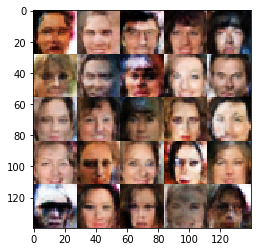

Epoch 1/1... Discriminator Loss: 0.6171... Generator Loss: 1.1679
Epoch 1/1... Discriminator Loss: 0.6590... Generator Loss: 0.9767
Epoch 1/1... Discriminator Loss: 0.5087... Generator Loss: 1.2363
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 0.9464
Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.6104... Generator Loss: 0.2884
Epoch 1/1... Discriminator Loss: 3.4427... Generator Loss: 5.2561
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.3942
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 1.6660
Epoch 1/1... Discriminator Loss: 0.7138... Generator Loss: 1.5988


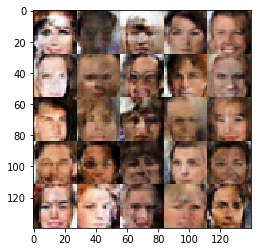

Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 0.8354
Epoch 1/1... Discriminator Loss: 0.8413... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 2.1188
Epoch 1/1... Discriminator Loss: 3.4712... Generator Loss: 4.9881
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 0.8173... Generator Loss: 1.0922
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 0.9949
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 1.1086
Epoch 1/1... Discriminator Loss: 0.5986... Generator Loss: 1.7844


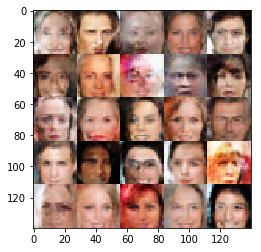

Epoch 1/1... Discriminator Loss: 0.5622... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 0.5008... Generator Loss: 1.2817
Epoch 1/1... Discriminator Loss: 0.6083... Generator Loss: 1.1597
Epoch 1/1... Discriminator Loss: 0.4691... Generator Loss: 1.4908
Epoch 1/1... Discriminator Loss: 0.4727... Generator Loss: 1.6789
Epoch 1/1... Discriminator Loss: 0.8536... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 0.6613... Generator Loss: 1.0561
Epoch 1/1... Discriminator Loss: 0.6418... Generator Loss: 1.2554
Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 0.5021


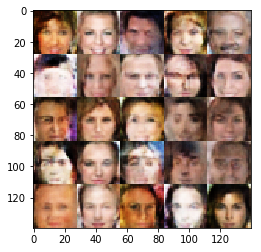

Epoch 1/1... Discriminator Loss: 0.6267... Generator Loss: 1.2252
Epoch 1/1... Discriminator Loss: 0.8231... Generator Loss: 0.7666
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 2.0279
Epoch 1/1... Discriminator Loss: 0.6196... Generator Loss: 1.5685
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 1.0756... Generator Loss: 1.7279
Epoch 1/1... Discriminator Loss: 2.3245... Generator Loss: 3.6641
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 0.5996
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 0.8023
Epoch 1/1... Discriminator Loss: 0.6538... Generator Loss: 1.2019


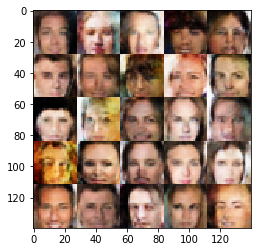

Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.4332
Epoch 1/1... Discriminator Loss: 0.4803... Generator Loss: 1.5444
Epoch 1/1... Discriminator Loss: 0.7843... Generator Loss: 0.7789
Epoch 1/1... Discriminator Loss: 0.4905... Generator Loss: 1.3217
Epoch 1/1... Discriminator Loss: 0.8045... Generator Loss: 0.8671
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 0.8738


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.